In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

Classification

#AND/OR

In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


In [4]:
D = x.shape[1]
w = [random() for i in range (D)]
b = random()

learning_rate = 1e-2
for step in range (101):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost+= error**2
    if step % 10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0} '.format(np.dot(x, np.array(w)) + b))

step 0: 3
step 10: 3
step 20: 3
step 30: 3
step 40: 2
step 50: 1
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w:  [0.2949597721912852, 0.38611658344243394]
b:  -0.40132973503103025
y_pred: [-0.40132974 -0.01521315 -0.10636996  0.27974662] 


In [5]:
D = x.shape[1]
w= 2* np.random.random(size=D) -1
b= 2* np.random.random() -1

learning_rate = 1e-2 #0.01
for step in range (101):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2

    if step % 10 == 0:
            print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0} '.format(np.dot(x, np.array(w)) + b))

step 0: 1
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w:  [0.14555929 0.45652511]
b:  -0.6018264069482415
y_pred: [-6.01826407e-01 -1.45301293e-01 -4.56267112e-01  2.58001990e-04] 


Classification exercise

(100, 2) (100,)


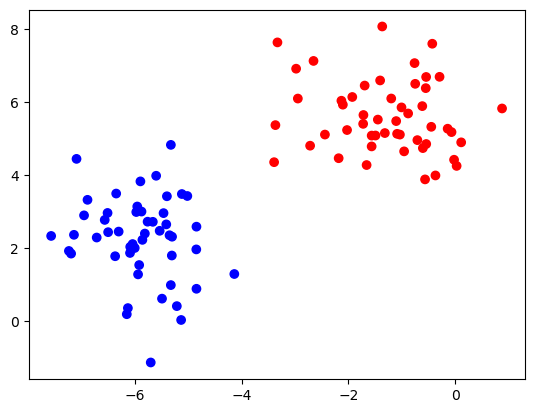

In [6]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [7]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

step 0: 1
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w:  [0.5839496470327478, 0.4368399178798231]
b:  0.8604675420181136
y_pred: [ 2.42489055 -0.57055033 -2.00170641  3.58868956  2.69035118 -1.57969514
  2.46835529 -0.60679419  2.39023552  2.22938653 -0.83730063  1.24053618
 -2.27506932 -1.14027327 -1.76724091 -2.08032375  2.92605627  3.32808455
 -1.24385558  2.25450219 -2.52328072  2.41811552  2.78176118  2.33535403
 -1.32072236  2.34338572 -1.58667719  3.07495225  2.22302713  2.61483058
  1.53720084  2.03909547 -2.07469536 -1.76034733 -2.05875647  2.25182935
  2.82628183  1.76141664 -0.66986676 -1.25673414 -2.53107614 -1.81591568
 -1.74361848  2.83226112 -1.92265064  2.66510642  1.66963561  2.32473937
 -1.22440197  3.61416798  2.61045506 -1.86959388 -2.56076288 -0.9888116
 -1.70867426  3.46553811  3.08267831  3.9300593   2.57957138  2.9206343
  3.06761238 -0.13947226  1.37442264  2.21578732  0.78341547 -2.1203613
 -1

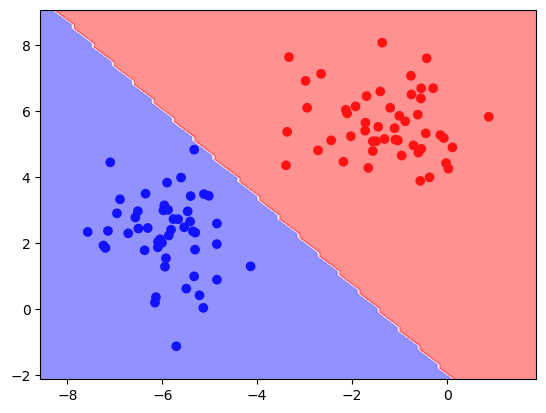

In [8]:
D = x.shape[1]
w = [random() for i in range (D)]
b = random()

learning_rate = 1e-2
for step in range (101):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost+= error**2
    if step % 10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0} '.format(np.dot(x, np.array(w)) + b))

plot_linear_classifier(x, y ,w, b)

#Implementing into a regression model

In [9]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/medidas.csv'

In [22]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

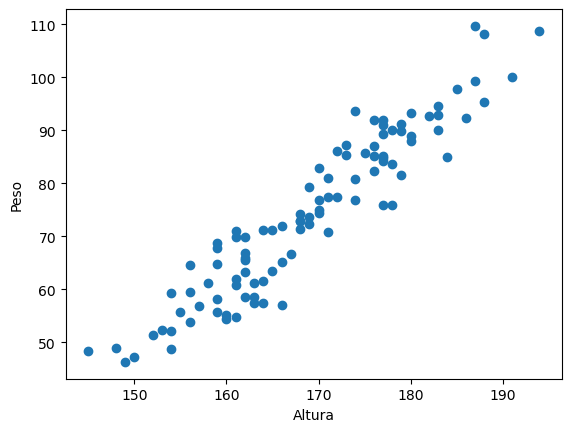

In [12]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [14]:
print(x.shape, y.shape)

(100,) (100,)


In [ ]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

#normalizing data
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

(100, 1) (100,)


In [ ]:
#Implementing
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

#defining the "steps"
for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + 1e-6*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1e-1*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 56632.41440862694
step 1000: 17533.394691211295
step 2000: 17083.5735355721
step 3000: 16647.07086399447
step 4000: 16223.493643175954
step 5000: 15812.460419153203
step 6000: 15413.600976441172
step 7000: 15026.55600720218
step 8000: 14650.976790149944
step 9000: 14286.524878901304
step 10000: 13932.871799498964
w:  [4.349930555260401]
b:  64.8886701495898


In [20]:
#Comparing with Sklearn
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102
